# Cargando las librerias requeridas

In [22]:
import numpy as np
import pandas as pd
import plotnine as ptn
import matplotlib.pyplot as plt

In [23]:
from sklearn import datasets

iris = datasets.load_iris()

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(X = iris.data)

# Hopkins statistics
La función `hopkins` del paquete `pyclustertend` permite calcular la tendencia de hopkins en forma rápida. Sin embargo, tiene problemas con largos set de datos.

La función recibe solo dos parámetros, los datos y el número de puntos aleatorios a generar.

``` python
hopkins(data_frame,
        sampling_size)
```
**Recuerde calcula 1 menos el valor del test**

Coeficiente de Hopkins, datos de iris escalados: 0.7867869989001894


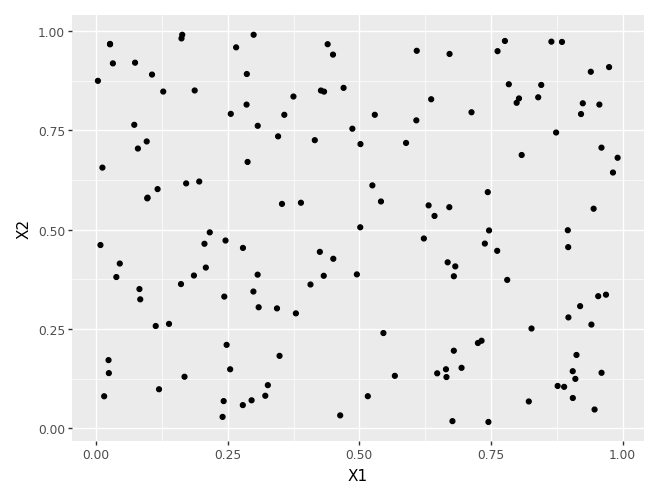

In [32]:
# Importando la función de hopkins
from pyclustertend import hopkins

print("Coeficiente de Hopkins, datos de iris escalados:", 1 - hopkins(data_frame = scaled_features, sampling_size = 10))

# Generando 150 datos aleatorios
tempData = np.random.uniform(low = 0,
                             high = 1,
                             size = (150, 2))

tempData = pd.DataFrame(data    = tempData,
                        columns = ["X1", "X2"])

(
    ptn.ggplot(data = tempData) +
    ptn.aes(x = "X1", y = "X2") + 
    ptn.geom_point()
)

In [33]:
print("Coeficiente de Hopkins, datos aleatorios:", 1 - hopkins(data_frame = tempData, sampling_size = 10))

Coeficiente de Hopkins, datos aleatorios: 0.4521240348300619


c:\mii\DS_MII_2025-20\.venv\Lib\site-packages\pyclustertend\hopkins.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
c:\mii\DS_MII_2025-20\.venv\Lib\site-packages\pyclustertend\hopkins.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


# Evaluación matriz de distancia
Para evaluar la matriz de distancia entre los puntos, utilizaremos las funciones `vat` del paquete `pyclustertend`. Tal como en el caso anterior, se tiene problemas con largos set de datos.

La función recibe un set de datos y despliega la matriz de distancia en forma ordenada para mejorar su visualización.


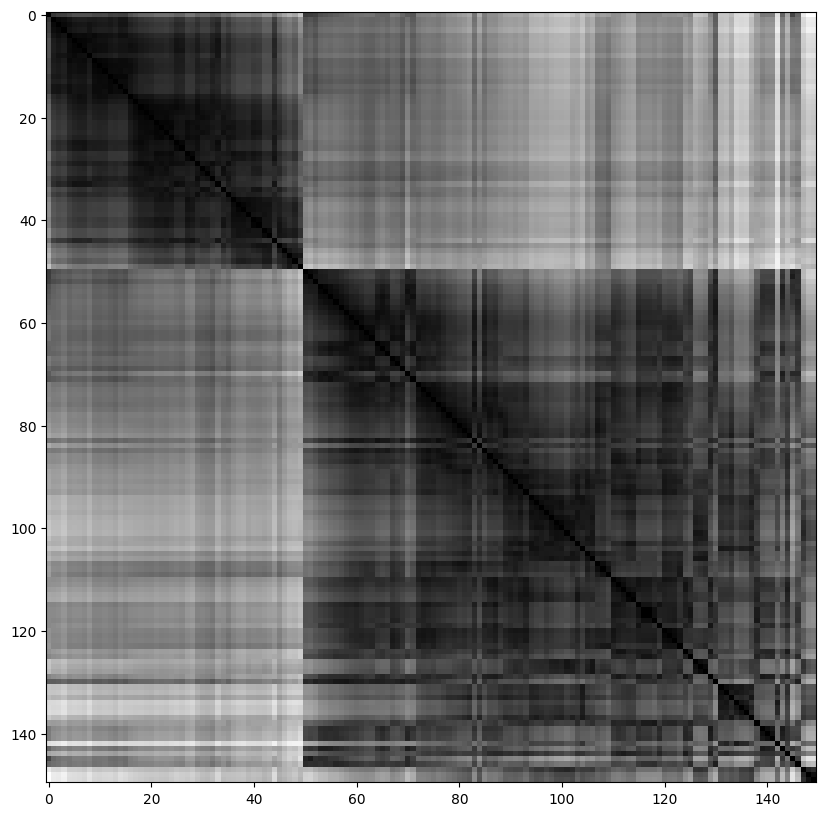

In [34]:
from pyclustertend import vat

vat(scaled_features)

plt.show()

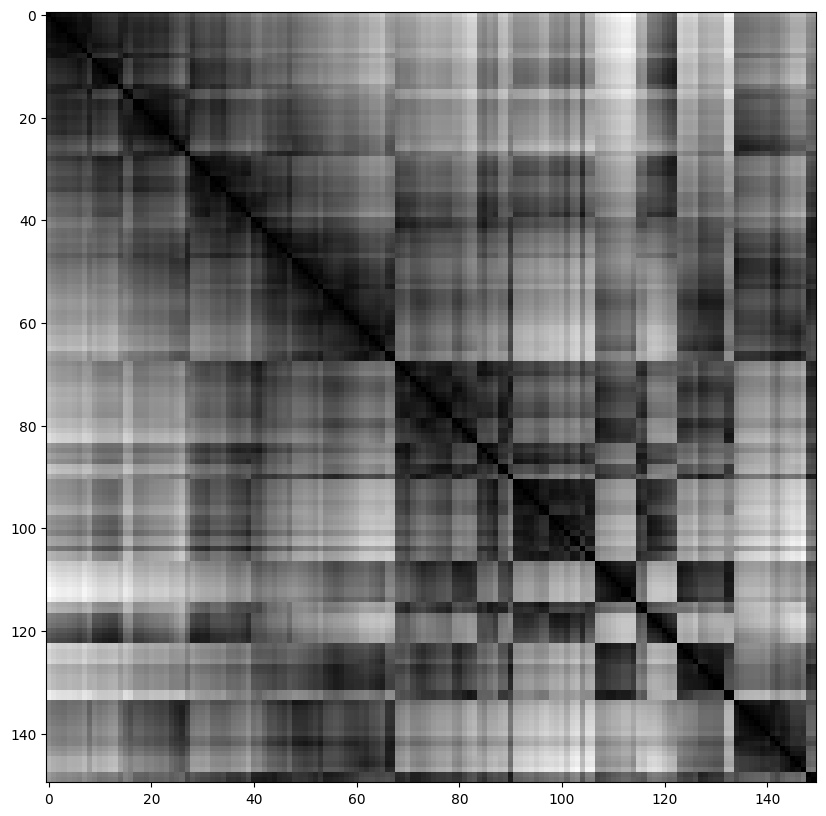

In [35]:
vat(tempData)

plt.show()

# Cohesion y separación
Los coeficientes de cohesión y separación deben ser calculados por nosotros mismos. Por lo cual, usando el código de abajo podemos calcularlos en forma rápida.

In [60]:
# Calculando la cohesión y separación
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)

km = km.fit(X = scaled_features)

tempCohesion = 0

for j in range(km.n_clusters):

    # Calculando el centro del clusters
    # centroCluster=np.mean(scaled_features[km.labels_==j,:],axis=0)
    centroCluster = km.cluster_centers_[j, :]
    
    # Calculando la cohesion para ese cluster
    tempCohesion += np.square(scaled_features[km.labels_ == j, :] - centroCluster).sum()

print("Cohesión: ", tempCohesion)
print("Inertia: ", km.inertia_)

tempSeparacion = 0

# Calculando el centro de los datos
centroData = np.mean(scaled_features, axis = 0)

for j in range(km.n_clusters):

    # Calculando el centro del clusters
    # centroCluster=np.mean(scaled_features[km.labels_==j,:],axis=0)
    centroCluster = km.cluster_centers_[j, :]
    
    # Calculando la separación para ese cluster
    tempSeparacion += (km.labels_ == j).sum()*np.square(centroCluster - centroData).sum()

print("Separación: ", tempSeparacion)
print("Separación + cohesión: ", tempSeparacion + tempCohesion)

Cohesión:  139.82049635974982
Inertia:  139.8204963597498
Separación:  460.17950364025035
Separación + cohesión:  600.0000000000002


# Coeficiente de silhouette 

El coeficiente de silhouette promedio se calcula con la función silhouette_score del paquete `sklearn.metrics`.

``` python
silhouette_score(X,
                 labels,
                 metric       = 'euclidean',
                 sample_size  = None,
                 random_state = None)
```


donde:

- `X`: set de datos o matriz de distancia.
- `labels`: etiquetas de los clusters.
- `metric`: métrica de distancia a utilizar, si 'X' es una matriz de distancia se utiliza "precomputed".
- `sample_size`: número de puntos (para grandes bases de datos).
- `random_state`: inicialización del número aleatorio para el sampleo.

De igual manera, la función `silhouette_samples` calcula el coeficiente de Silhouette para cada punto por separado

``` python
silhouette_samples(X,
                   labels,
                   metric = 'euclidean')
```

donde:

- `X`: set de datos o matriz de distancia.
- `labels`: etiquetas de los clusters.
- `metric`: métrica de distancia a utilizar, si 'X' es una matriz de distancia se utiliza "precomputed".

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

numClusters = 3

km = KMeans(n_clusters = numClusters)

km = km.fit(X = scaled_features)

# Calculando el coeficiente de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(X      = scaled_features,
                                              labels = km.labels_)
print(sample_silhouette_values)

# Calculando el coeficiente de silhouette promedio
silhouette_avg = silhouette_score(X      = scaled_features,
                                  labels = km.labels_)
print("Para n_clusters =", numClusters, "el coeficiente promedio de silhouette_score es:", silhouette_avg)
print("Equivalente a ", np.average(silhouette_samples(X = scaled_features, labels = km.labels_)))

[0.73725702 0.57555077 0.68228955 0.62650899 0.73137007 0.6126874  0.70229498 0.73425877 0.49680485 0.63733095 0.67711162 0.7254104  0.58538286 0.55628202 0.55551732 0.45665322 0.62386294 0.73190163 0.58890031
 0.68027522 0.66456691 0.69318955 0.69980155 0.64266196 0.705265   0.55281132 0.70859714 0.72468762 0.71806204 0.67277988 0.63169018 0.65214977 0.59230758 0.54330074 0.63441014 0.68085799 0.66896786 0.7273686
 0.55976494 0.72819049 0.73644902 0.09416945 0.64247819 0.66774383 0.6516848  0.56690881 0.68162297 0.6709913  0.69199082 0.71475684 0.34204189 0.15930857 0.35323966 0.54183813 0.16720305 0.53805153 0.22934539
 0.39233451 0.06122802 0.53810643 0.41314196 0.34827085 0.47207666 0.3480404  0.48967486 0.18101552 0.39597038 0.54436476 0.4183102  0.57672745 0.02034218 0.46256106 0.39358452 0.43484879 0.23414352 0.03281012
 0.00571151 0.32364163 0.38843879 0.54909517 0.5612013  0.55104983 0.56414545 0.41558749 0.40560833 0.10975051 0.27067125 0.43135699 0.43733163 0.58159354 0.5795

<positron-console-cell-76>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


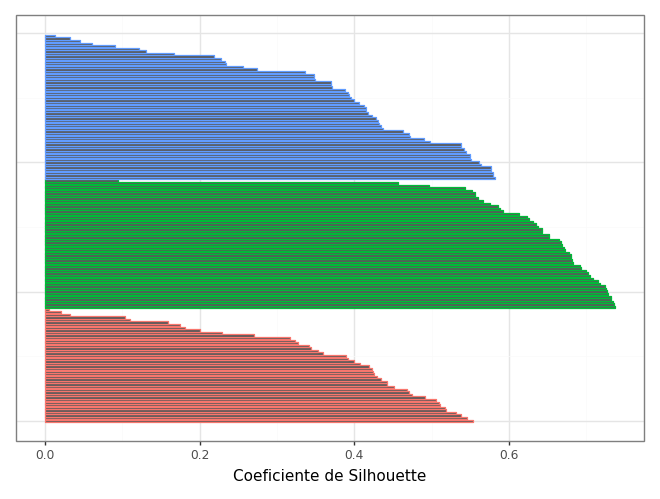

In [76]:
# Visualizando los coeficientes de Silhouette
tempDF = pd.DataFrame(columns = ['SC', 'labels'])

for i in range(km.n_clusters):

    # Ordenando los valores de cada cluster para mostrarlos de menor a mayor
    tempData = np.sort(sample_silhouette_values[km.labels_ == i])[::-1]
    
    tempDF2  = pd.DataFrame(data    = tempData,
                            columns = ["SC"])
    tempDF2["labels"] = i
    
    # Agregandolo a un nuevo data frame
    tempDF = pd.concat([tempDF, tempDF2], ignore_index = True)

tempDF.reset_index(drop = True, inplace = True)

(
    ptn.ggplot(data = tempDF) +
    ptn.aes(y = "SC", x = range(150), color = "factor(labels)") +
    ptn.geom_col(show_legend = False) + 
    ptn.coord_flip() +
    ptn.theme_bw() +
    ptn.labs(y = "Coeficiente de Silhouette") +
    ptn.theme(axis_text_y        = ptn.element_blank(),
              axis_ticks_major_y = ptn.element_blank())
)

# Buscando el mejor número de clusters

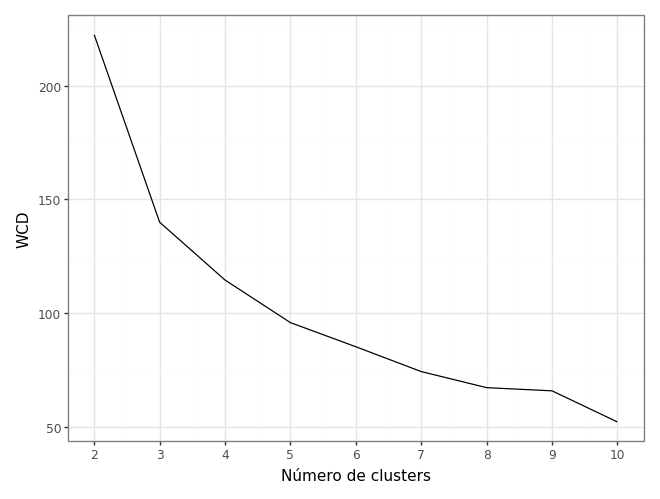

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score

maxK = 11
sse  = np.zeros(maxK - 2)
CS   = np.zeros(maxK - 2)

for k in range(2, maxK):

    kmeans = KMeans(n_clusters = k)

    kmeans.fit(X = scaled_features)
    
    sse[k - 2] = kmeans.inertia_
    
    silhouette_avg = silhouette_score(X      = scaled_features,
                                      labels = kmeans.labels_)
    CS[k - 2] = silhouette_avg

tempData = pd.DataFrame(data    = range(2, maxK),
                        columns = ["K"])
tempData["sse"] = sse
tempData["CS"]  = CS

(
    ptn.ggplot(data = tempData)+
    ptn.aes(x = "K", y = "sse") +
    ptn.theme_bw() +
    ptn.geom_line() + 
    ptn.labs(x = "Número de clusters", y = "WCD") +
    ptn.scale_x_continuous(breaks = range(1, maxK))
)

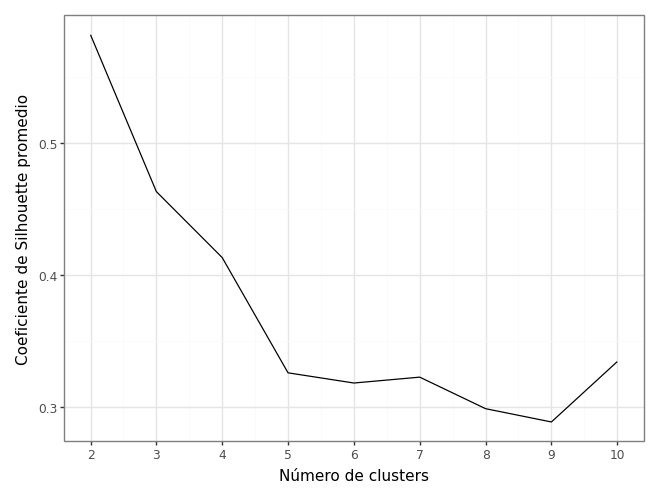

In [78]:
(
    ptn.ggplot(data = tempData) +
    ptn.aes(x = "K", y = "CS") +
    ptn.theme_bw() + 
    ptn.geom_line() + 
    ptn.labs(x = "Número de clusters", y = "Coeficiente de Silhouette promedio") +
    ptn.scale_x_continuous(breaks = range(1, maxK))
)